GitHub: https://github.com/MYUSER/MYPROJECT/

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Run the following cell to load the packages you will need.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [9]:
df = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT799 (Human Aligned AI)\Tasks and Assignments/Task-1.3C/1.3C - Classification using FFNN/data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [11]:
# START YOUR CODE HERE
model = Sequential()
model.add(Dense(12, input_dim=512, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

Now, let's start our training.

In [13]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
60/60 [==============================] - 0s 997us/step - loss: 0.5613 - accuracy: 0.7516
Epoch 2/200
60/60 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.9263
Epoch 3/200
60/60 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9712
Epoch 4/200
60/60 [==============================] - 0s 980us/step - loss: 0.0593 - accuracy: 0.9885
Epoch 5/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9963
Epoch 6/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9990
Epoch 7/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9995
Epoch 8/200
60/60 [==============================] - 0s 964us/step - loss: 0.0065 - accuracy: 0.9997
Epoch 9/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.9997
Epoch 10/200
60/60 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9997
Epo

In [14]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [15]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


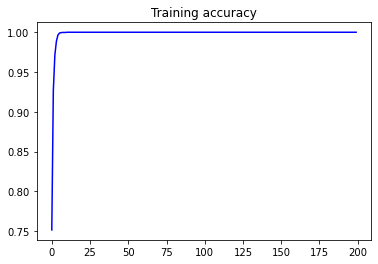

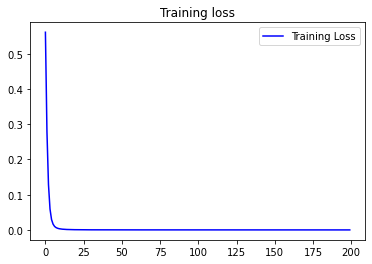

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

In [17]:
# START YOUR CODE HERE
print(confusion_matrix(test,pred))
print(classification_report(test,pred))


[[675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       675

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675



In [18]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test, pred, average='weighted', labels=np.unique(pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(test, pred, average='weighted', labels=np.unique(pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred))


Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Absolute Error: 0.0


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

